In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Importing data
ipl_auction_df = pd.read_csv(r'C:\Users\USER\Desktop\wiley\Machine Learning (Codes and Data Files)\Data\IPL IMB381IPL2013.csv')
ipl_auction_df.head()

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
0,1,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00,...,0.00,0,307,15,20.47,8.90,13.93,2009,50000,50000
1,2,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41,...,0.00,0,29,0,0.00,14.50,0.00,2008,50000,50000
2,3,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.62,...,121.01,5,1059,29,36.52,8.81,24.90,2008,200000,350000
3,4,"Ashwin, R",1,IND,CSK,Bowler,284,31,241,84.56,...,76.32,0,1125,49,22.96,6.23,22.14,2011,100000,850000
4,5,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.93,...,120.71,28,0,0,0.00,0.00,0.00,2011,100000,800000


# Objective - To predict 'SOLD PRICE' of a player in IPL,given past performance measures

In [3]:
ipl_auction_df.columns

Index(['Sl.NO.', 'PLAYER NAME', 'AGE', 'COUNTRY', 'TEAM', 'PLAYING ROLE',
       'T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'CAPTAINCY EXP', 'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C',
       'WKTS', 'AVE-BL', 'ECON', 'SR-BL', 'AUCTION YEAR', 'BASE PRICE',
       'SOLD PRICE'],
      dtype='object')

In [4]:
# Seleting required features

X_features = ['AGE', 'COUNTRY', 'PLAYING ROLE',
       'T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'CAPTAINCY EXP', 'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C',
       'WKTS', 'AVE-BL', 'ECON', 'SR-BL']

In [5]:
cat_feat = ['AGE','COUNTRY','PLAYING ROLE','CAPTAINCY EXP']

In [6]:
# Encoding categorical data

ipl_auction_encoded_df = pd.get_dummies(ipl_auction_df[X_features],columns=cat_feat,drop_first=True) 

In [7]:
ipl_auction_encoded_df.columns

Index(['T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS', 'AVE-BL',
       'ECON', 'SR-BL', 'AGE_2', 'AGE_3', 'COUNTRY_BAN', 'COUNTRY_ENG',
       'COUNTRY_IND', 'COUNTRY_NZ', 'COUNTRY_PAK', 'COUNTRY_SA', 'COUNTRY_SL',
       'COUNTRY_WI', 'COUNTRY_ZIM', 'PLAYING ROLE_Batsman',
       'PLAYING ROLE_Bowler', 'PLAYING ROLE_W. Keeper', 'CAPTAINCY EXP_1'],
      dtype='object')

In [8]:
X = ipl_auction_encoded_df
y = ipl_auction_df['SOLD PRICE']

# SCALING

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
X_scaler = StandardScaler()

In [11]:
X_scaled = X_scaler.fit_transform(X)

In [12]:
y = (y - y.mean())/y.std()

# DATA SPLIT

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# MODEL BUILDING

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lm = LinearRegression()

In [17]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
# Coeff

lm.coef_

array([-0.43539611, -0.04632556,  0.50840867, -0.03323988,  0.2220377 ,
       -0.05065703,  0.17282657, -0.49173336,  0.58571405, -0.11654753,
        0.24880095,  0.09546057,  0.16428731,  0.26400753, -0.08253341,
       -0.28643889, -0.26842214, -0.21910913, -0.02622351,  0.24817898,
        0.18760332,  0.10776084,  0.04737488,  0.05191335,  0.01235245,
        0.00547115, -0.03124706,  0.08530192,  0.01790803, -0.05077454,
        0.18745577])

In [19]:
# Intercepts
lm.intercept_

0.021855995320328277

# Most Influential Features

In [20]:
df = pd.DataFrame({'coef':lm.coef_ , 'columns':ipl_auction_encoded_df.columns})

In [21]:
df_sorted=df.sort_values(by='coef',ascending=False)

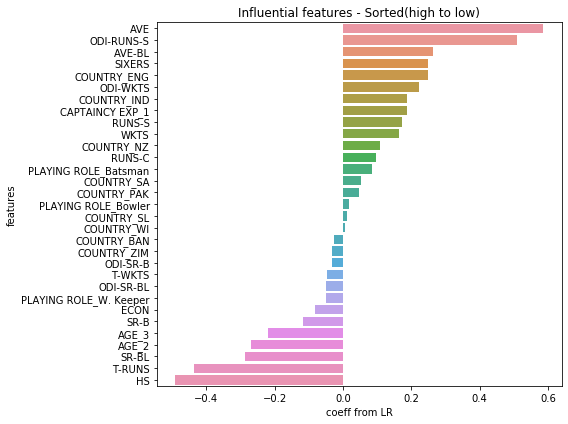

In [22]:
plt.figure(figsize=(8,6))
sns.barplot('coef','columns',data=df_sorted)
plt.xlabel('coeff from LR')
plt.ylabel('features')
plt.title('Influential features - Sorted(high to low)')
plt.tight_layout()

# Check for OVERFIT

In [23]:
# RMSE on training data
y_pred_train = lm.predict(X_train)

from sklearn import metrics

np.sqrt(metrics.mean_squared_error(y_train,y_pred_train))


0.6793950429977006

In [24]:
# RMSE on testing data
y_pred_test = lm.predict(X_test)

np.sqrt(metrics.mean_squared_error(y_test,y_pred_test))

0.7485680800731184

# LASSO REGRESSION

In [25]:
from sklearn.linear_model import Lasso

In [26]:
lasso = Lasso(alpha=0.01,max_iter=500)

In [27]:
lasso.fit(X_train,y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=500,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [28]:
# Check for overfit

# RMSE on training data
y_pred_train_lasso = lasso.predict(X_train)
print(np.sqrt(metrics.mean_squared_error(y_train,y_pred_train_lasso)))


# RMSE on testing data
y_pred_test_lasso = lasso.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred_test_lasso)))

0.6883735056292882
0.6982872223862224


In [29]:
lasso_df = pd.DataFrame({'col': ipl_auction_encoded_df.columns , 'coef':lasso.coef_})

In [30]:
lasso_df.sort_values(by='coef')

,col,coef
7,HS,-0.352652
0,T-RUNS,-0.301242
16,AGE_2,-0.202695
17,AGE_3,-0.177818
9,SR-B,-0.083146
29,PLAYING ROLE_W. Keeper,-0.048160
5,ODI-SR-BL,-0.035893
14,ECON,-0.035888
26,COUNTRY_ZIM,-0.025943
18,COUNTRY_BAN,-0.023023


# RIDGE REGRESSION

In [31]:
from sklearn.linear_model import Ridge

In [32]:
ridge = Ridge(alpha=1 , max_iter=500)

In [33]:
ridge.fit(X_train,y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=500, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [34]:
# Check for overfit

# RMSE on training data
y_pred_train_ridge = ridge.predict(X_train)
print(np.sqrt(metrics.mean_squared_error(y_train,y_pred_train_ridge)))


# RMSE on testing data
y_pred_test_ridge = ridge.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred_test_ridge)))

0.6804918665100159
0.723792344862343
